In [1]:
import re
import nltk
#nltk.download("stopwords")  #downloading stopwords
#nltk.download('punkt')
#nltk.download('wordnet')
import nltk as nlp
import string
from nltk import word_tokenize,sent_tokenize
from sklearn import preprocessing
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, java

import seaborn as sns

from sklearn.metrics import r2_score
import statsmodels.api as sm

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn import metrics

from sklearn.model_selection import KFold, train_test_split, cross_val_predict, cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from sklearn.feature_extraction.text import CountVectorizer 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [3]:
import urllib.request
import os
import tempfile
import sys
import fileinput
import logging
import jpype

# Bu 2 sütun category ve text ismindedir. Category sınıfı bizim tahmin etmeye çalışacağımız sınıftır ve 7 farklı değer almaktadır. Sınıflarımız ve sayıları aşağıdaki gibidir.

dunya         700
ekonomi       700
spor          700
teknoloji     700
kultur        700
saglik        700
siyaset       700

In [4]:
df = pd.read_csv("7allV03.csv")
df

,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...
...,...,...
4895,teknoloji,iphone lara geri dönüyor ios 6 sürümüyle tele...
4896,teknoloji,muslukta devrim sadece elimizi yıkadığımız mu...
4897,teknoloji,halka iyi anlatılmalı bilgi_teknolojileri ile...
4898,teknoloji,çöpe gidiyorlar apple 775 bin uygulamayla app...


In [5]:
df.category.count()

4900

Öncelikle, tahmin etmeye çalıştığımız sınıfımızı sayısal değerlere çevirmeliyiz. Basit bir şekilde her sınıf için 0'dan başlayarak numaralandırabiliriz. Bunun için genellikle sklearn[2]kütüphanesinin LabelEncoder’i kullanılır.

In [6]:
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(df.category)

y

array([4, 4, 4, ..., 6, 6, 6])

In [7]:
def tokenizasyon(text):
    return word_tokenize(text)
def lemmatizer(text):
    lemma_words = []
    ZEMBEREK_PATH = r'C:\Users\Ensar\Desktop\ml\zemberek-full.jar'
    if jpype.isJVMStarted() is False:
        startJVM(getDefaultJVMPath(), '-ea', '-Djava.class.path=%s' % (ZEMBEREK_PATH))
    TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
    morphology = TurkishMorphology.createWithDefaults()
    for text in tokenizasyon(text):
        lemma_word = str(morphology.analyzeAndDisambiguate(str(text)).bestAnalysis()[0].getLemmas()[0])
        lemma_words.append(lemma_word)
    text = ' '.join(lemma_words)
    return text

def convert_lowercase(text):
    return text.lower()
def remove_punctuation(text):
    return ''.join(d for d in text if d not in string.punctuation)
def remove_stopwords(text):
    stopwords = []
    with open(r'C:\Users\Ensar\Desktop\ml\stopwords.txt', 'r',encoding='utf-8') as f:
        for word in f:
            word = word.split('\n')
            stopwords.append(word[0])
    clean_text = ' '.join(s for  s in text.split() if s not in stopwords)
    return clean_text
def remove_numbers(text):
    text = re.sub(r'\d', '', text)
    return text
def remove_less_than_2(text):
    text = ' '.join([w for w in text.split() if len(w)>2])
    return text
def remove_extra_space(text):
    ornek_text_strip = re.sub(' +', ' ', text)
    return ornek_text_strip.strip()

# ÖN İŞLEME

In [9]:
# df['text'] için ön işleme yapıldı
""" 
df['text'] = df['text'].apply(lemmatizer)
df['text'] = df['text'].apply(convert_lowercase)
df['text'] = df['text'].apply(remove_punctuation)
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(remove_extra_space)
df['text'] = df['text'].apply(remove_numbers)
df['text'] = df['text'].apply(remove_less_than_2)
"""

In [10]:
"""
texts = []
for text in df.text:
    texts.append(text)
"""

In [12]:
texts

['seçim vaat mhp unk olağan büyük kurultay nda konuş genel başkan aday unk seçim parti üye sayı ulaş hedef koy seçim uygula vaat bulun mhp unk olağan büyük kurultay nda konuş genel başkan aday unk seçim parti üye sayı ulaş hedef koy seçim uygula vaat bulun unk aday unk kürsü bekle yap tezahürat ıslıkla üzeri divan başkan unk mhp unk genel başkan genel başkan aday saygıdeğer salon ciddi zor taşkın izin ver salon sükunet sağla konuş başla vurgula türkeş unk unk kurultay konuş aday ikinci konuş yap açıkla konuş kurultay mhp unk baş iktidar vesile dile aydın unk unk mhp eleştir kale fethet yol devam söyle hatırla iktidar basın sivil toplum sus ifade unk unk bürokrasi taş üst taş bırak ileri sür aydın ülkü düşman kabul kıyma makine geçir zihniyet sürgün ora bura sal bürokrasi ülkü kadro savaş yaşa skandal ardından devlet çete mantık yönet siyasi iktidar savun aydın iktidar belediye sahte rapor dinle sal savun aydın arka habur dan içeri sok vatan hain karşıla tören yet oslo terörist kur paza

In [32]:
# önişlenmiş verileri kelimeler.txt olarak kaydediyorum
"""
with open("kelimeler.txt", 'w') as f:
    for s in texts:
        f.write(str(s) + '\n')
"""

In [7]:
# önişlenmiş verileri çağırıyorum
with open("kelimeler.txt", 'r') as f:
    kelimeler = [line.rstrip('\n') for line in f]

kelimeler

['seçim vaat mhp unk olağan büyük kurultay nda konuş genel başkan aday unk seçim parti üye sayı ulaş hedef koy seçim uygula vaat bulun mhp unk olağan büyük kurultay nda konuş genel başkan aday unk seçim parti üye sayı ulaş hedef koy seçim uygula vaat bulun unk aday unk kürsü bekle yap tezahürat ıslıkla üzeri divan başkan unk mhp unk genel başkan genel başkan aday saygıdeğer salon ciddi zor taşkın izin ver salon sükunet sağla konuş başla vurgula türkeş unk unk kurultay konuş aday ikinci konuş yap açıkla konuş kurultay mhp unk baş iktidar vesile dile aydın unk unk mhp eleştir kale fethet yol devam söyle hatırla iktidar basın sivil toplum sus ifade unk unk bürokrasi taş üst taş bırak ileri sür aydın ülkü düşman kabul kıyma makine geçir zihniyet sürgün ora bura sal bürokrasi ülkü kadro savaş yaşa skandal ardından devlet çete mantık yönet siyasi iktidar savun aydın iktidar belediye sahte rapor dinle sal savun aydın arka habur dan içeri sok vatan hain karşıla tören yet oslo terörist kur paza

# EĞİTİM VE TEST

CountVectorizer ile verimizi vektörleştiriyoruz.

# 1. CountVectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=500
cv = CountVectorizer(max_features=max_features) 
X = cv.fit_transform(kelimeler).toarray()

In [10]:
X.shape

(4900, 500)

TF-IDF ile verimizi vektörleştiriyoruz.

# 2. TFidfVectorizer

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features=500 # "number" most common(used) words in reviews
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000) 
X = tfidf.fit_transform(kelimeler).toarray()

In [9]:
X.shape

(4900, 5000)

In [10]:
y

array([4, 4, 4, ..., 6, 6, 6])

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Daha sonra kullanacağımız makine öğrenmesi yöntemlerini tanımlayıp eğitimini ardından testini, yani tahmin etme işlemini gerçekleştiriyoruz.

# SINIFLANDIRMALAR  __________________________________________________________________________________________________

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       131
           1       0.78      0.82      0.80       142
           2       0.83      0.91      0.87       139
           3       0.88      0.93      0.91       122
           4       0.87      0.65      0.75       158
           5       0.91      0.95      0.93       147
           6       0.81      0.87      0.84       141

    accuracy                           0.84       980
   macro avg       0.84      0.84      0.84       980
weighted avg       0.84      0.84      0.84       980

Knn Accuracy değeri: 84.08163265306122
Knn Precision değeri: 79.06976744186046
Knn Recall değeri: 77.86259541984732
Knn F1 Score değeri: 78.46153846153847
MAE değeri: 0.463265306122449
MSE değeri: 1.6959183673469387
RMSE değeri: 1.3022743057232369


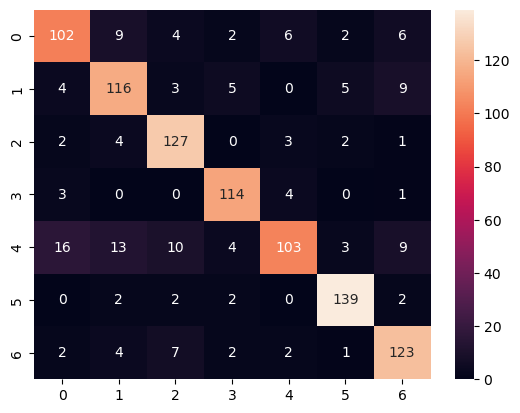

In [12]:
#KNN
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print(classification_report(y_test,y_pred))

# Accuracy
knnDogruluk=accuracy_score(y_test,y_pred)
print("Knn Accuracy değeri:",knnDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Knn Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Knn Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("Knn F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

In [20]:
#KNN
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi

warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanKNN = accuracy.mean()*100
print('Accuracy', accMeanKNN)
"""
precision = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring='precision')
precision = precision.mean()*100
print('Precision', precision)

recall = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring='recall')
recall = recall.mean()*100
print('Recall', recall)

f1_score = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring='f1')
f1_score = f1_score.mean()*100
print('F1_score', f1_score)

MAE = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring="neg_mean_absolute_error")
MAE = MAE.mean()
print('MAE değeri', np.abs(MAE) )

MSE = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
MSE = MSE.mean()
print('MAE değeri', np.abs(MSE) )

# RMSE
RMSE = np.sqrt( np.abs(MSE) )
print("RMSE değeri:",RMSE)
"""

Accuracy 82.98469387755102


'\nprecision = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring=\'precision\')\nprecision = precision.mean()*100\nprint(\'Precision\', precision)\n\nrecall = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring=\'recall\')\nrecall = recall.mean()*100\nprint(\'Recall\', recall)\n\nf1_score = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring=\'f1\')\nf1_score = f1_score.mean()*100\nprint(\'F1_score\', f1_score)\n\nMAE = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring="neg_mean_absolute_error")\nMAE = MAE.mean()\nprint(\'MAE değeri\', np.abs(MAE) )\n\nMSE = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")\nMSE = MSE.mean()\nprint(\'MAE değeri\', np.abs(MSE) )\n\n# RMSE\nRMSE = np.sqrt( np.abs(MSE) )\nprint("RMSE değeri:",RMSE)\n'

In [25]:
#KNN
# k-fold sonucunu dosyaya kaydediyorum
import pickle
dosya = "save/kfold_save/knn_cv"
pickle.dump(accMeanKNN, open(dosya,'wb'))
knnR = pickle.load(open(dosya,'rb'))

print( knnR )


82.98469387755102


In [ ]:
# knn modelinin sonucunun dosyaya kayıt edilmesi
"""
import pickle
dosya = "save/model_save/knn"
pickle.dump(knn, open(dosya,'wb'))
knnR = pickle.load(open(dosya,'rb'))

y_pred = knnR.predict(X_test)

print(classification_report(y_test,y_pred))

# Accuracy
knnDogruluk=accuracy_score(y_test,y_pred)
print("Knn Accuracy değeri:",knnDogruluk*100)
"""

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       131
           1       0.87      0.86      0.87       142
           2       0.94      0.94      0.94       139
           3       0.92      0.98      0.95       122
           4       0.89      0.85      0.87       158
           5       0.99      0.97      0.98       147
           6       0.90      0.93      0.92       141

    accuracy                           0.91       980
   macro avg       0.91      0.91      0.91       980
weighted avg       0.91      0.91      0.91       980

Logistik Regresyon doğruluk: 90.71428571428571
Precision değeri: 83.96946564885496
Recall değeri: 83.96946564885496
F1 Score değeri: 83.96946564885496
MAE değeri: 0.28877551020408165
MSE değeri: 1.113265306122449
RMSE değeri: 1.055113883010952


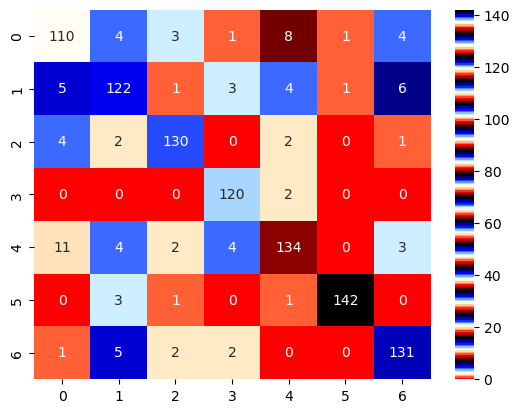

In [45]:
#LogisticRegression
warnings.filterwarnings('ignore')

logr = LogisticRegression()
logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
logDogruluk=accuracy_score(y_test,y_pred)
print("Logistik Regresyon doğruluk:", logDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f",cmap='flag')
plt.show()

In [44]:
#LogisticRegression
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = logr, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanlogr = accuracy.mean()*100
print('Accuracy', accMeanlogr)

precision = cross_val_score(estimator = logr, X=X_train, y=y_train, cv=10, scoring='precision')
precision = precision.mean()*100
print('Precision', precision)

recall = cross_val_score(estimator = logr, X=X_train, y=y_train, cv=10, scoring='recall')
recall = recall.mean()*100
print('Recall', recall)

f1_score = cross_val_score(estimator = logr, X=X_train, y=y_train, cv=10, scoring='f1')
f1_score = f1_score.mean()*100
print('F1_score', f1_score)

MAE = cross_val_score(estimator = logr, X=X_train, y=y_train, cv=10, scoring="neg_mean_absolute_error")
MAE = MAE.mean()
print('MAE değeri', np.abs(MAE) )

MSE = cross_val_score(estimator = logr, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
MSE = MSE.mean()
print('MAE değeri', np.abs(MSE) )

# RMSE
RMSE = np.sqrt( np.abs(MSE) )
print("RMSE değeri:",RMSE)

90.02551020408163

              precision    recall  f1-score   support

           0       0.22      0.92      0.36       131
           1       0.00      0.00      0.00       142
           2       0.80      0.65      0.72       139
           3       0.89      0.70      0.78       122
           4       0.91      0.31      0.46       158
           5       0.99      0.59      0.74       147
           6       0.62      0.39      0.48       141

    accuracy                           0.50       980
   macro avg       0.63      0.51      0.51       980
weighted avg       0.64      0.50      0.50       980

Decision Tree doğruluk: 49.69387755102041
Precision değeri: 22.283609576427256
Recall değeri: 92.36641221374046
F1 Score değeri: 35.90504451038575
MAE değeri: 1.6489795918367347
MSE değeri: 7.106122448979592
RMSE değeri: 2.665731128411039


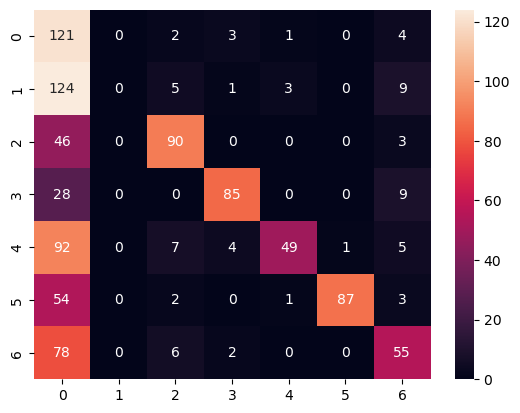

In [46]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
dtDogruluk=accuracy_score(y_test,y_pred)
print("Decision Tree doğruluk:", dtDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [47]:
#DecisionTreeClassifier
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = dt, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanDT = accuracy.mean()*100
print('Accuracy', accMeanDT)

49.56632653061225

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       131
           1       0.84      0.87      0.86       142
           2       0.93      0.94      0.93       139
           3       0.94      0.98      0.96       122
           4       0.92      0.84      0.88       158
           5       0.99      0.95      0.97       147
           6       0.88      0.89      0.89       141

    accuracy                           0.91       980
   macro avg       0.91      0.91      0.91       980
weighted avg       0.91      0.91      0.91       980

SVM doğruluk: 90.51020408163265
Precision değeri: 83.94160583941606
Recall değeri: 87.78625954198473
F1 Score değeri: 85.82089552238806
MAE değeri: 0.3112244897959184
MSE değeri: 1.256122448979592
RMSE değeri: 1.1207686866519746


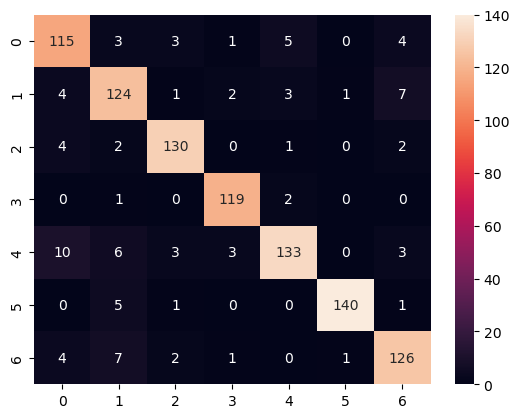

In [59]:
#SVC
warnings.filterwarnings('ignore')

"""
svc için en iyi değerler
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
"""

dvm = SVC(probability=True)
dvm.fit(X_train,y_train)

y_pred=dvm.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
dvmDogruluk=accuracy_score(y_test,y_pred)
print("SVM doğruluk:", dvmDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [60]:
import warnings
warnings.filterwarnings('ignore')

#SVC
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = dvm, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanSVC = accuracy.mean()*100
print('Accuracy', accMeanSVC)


90.0

              precision    recall  f1-score   support

           0       0.77      0.62      0.69       131
           1       0.67      0.79      0.73       142
           2       0.79      0.79      0.79       139
           3       0.93      0.93      0.93       122
           4       0.71      0.82      0.76       158
           5       0.99      0.90      0.94       147
           6       0.84      0.80      0.82       141

    accuracy                           0.81       980
   macro avg       0.82      0.81      0.81       980
weighted avg       0.81      0.81      0.81       980

Gaussian NB doğruluk: 80.61224489795919
Precision değeri: 77.14285714285715
Recall değeri: 61.832061068702295
F1 Score değeri: 68.64406779661017
MAE değeri: 0.5918367346938775
MSE değeri: 2.216326530612245
RMSE değeri: 1.488733196584346


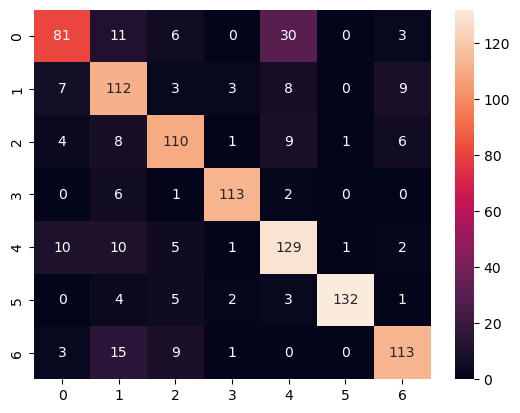

In [61]:
#GaussianNB
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred=gnb.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
gnbDogruluk=accuracy_score(y_test,y_pred)
print("Gaussian NB doğruluk:", gnbDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [62]:
#GaussianNB
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = gnb, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanGNB = accuracy.mean()*100
print('Accuracy', accMeanGNB)

80.17857142857142

              precision    recall  f1-score   support

           0       0.38      0.53      0.44       131
           1       0.58      0.51      0.55       142
           2       0.76      0.74      0.75       139
           3       0.65      0.78      0.71       122
           4       0.68      0.61      0.65       158
           5       0.86      0.86      0.86       147
           6       0.68      0.48      0.56       141

    accuracy                           0.64       980
   macro avg       0.66      0.65      0.65       980
weighted avg       0.66      0.64      0.65       980

RandomForest doğruluk: 64.48979591836735
Precision değeri: 37.83783783783784
Recall değeri: 53.43511450381679
F1 Score değeri: 44.30379746835443
MAE değeri: 1.1051020408163266
MSE değeri: 4.38265306122449
RMSE değeri: 2.0934786985361207


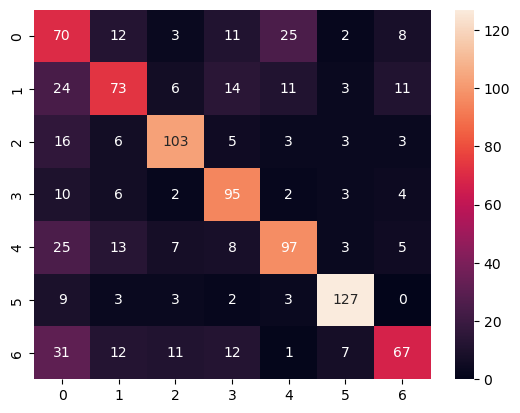

In [63]:
#RandomForestClassifier
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
randomForestDogruluk=accuracy_score(y_test,y_pred)
print("RandomForest doğruluk:", randomForestDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()


In [64]:
#RandomForestClassifier
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = rfc, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanRFC = accuracy.mean()*100
print('Accuracy', accMeanRFC)

63.46938775510205

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       131
           1       0.81      0.83      0.82       142
           2       0.91      0.89      0.90       139
           3       0.89      0.94      0.92       122
           4       0.84      0.79      0.82       158
           5       0.96      0.93      0.94       147
           6       0.87      0.89      0.88       141

    accuracy                           0.86       980
   macro avg       0.86      0.87      0.87       980
weighted avg       0.87      0.86      0.86       980

ANN doğruluk: 86.42857142857143
Precision değeri: 75.91240875912408
Recall değeri: 79.38931297709924
F1 Score değeri: 77.61194029850745
MAE değeri: 0.4142857142857143
MSE değeri: 1.5693877551020408
RMSE değeri: 1.252752072479643


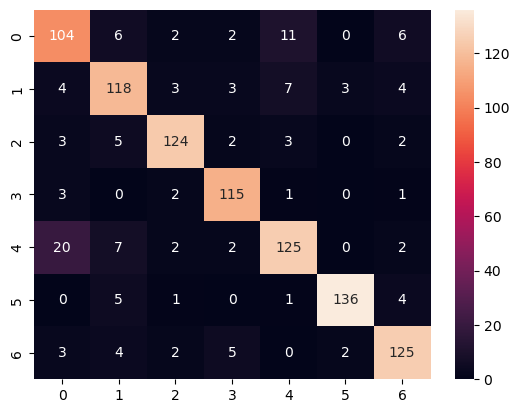

In [65]:
#Yapay Sinir Ağları(Artificial Nerual Network)

from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()

#mlpc_params = {'alpha':[1, 5, 0.1, 0.01, 0.03, 0.005, 0.0001 ],
              'hidden_layer_sizes': [(10,10), (100,100,100), (100,100), (3,5)]}
#mlpc = MLPClassifier(solver='lbfgs', activation='logistic')

#mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=10, n_jobs=-1, verbose=2).fit(X_train_scaler, y_train)
#mlpc_cv_model
#mlpc_cv_model.best_params_


mlpc.fit(X_train,y_train)

y_pred = mlpc.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
annDogruluk=accuracy_score(y_test,y_pred)
print("ANN doğruluk:", annDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [67]:
#ANN

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = mlpc, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanANN = accuracy.mean()*100
print('Accuracy', accMeanANN)

84.3112244897959

              precision    recall  f1-score   support

           0       0.19      0.95      0.32       131
           1       0.33      0.01      0.01       142
           2       0.81      0.45      0.58       139
           3       0.92      0.70      0.79       122
           4       0.91      0.33      0.48       158
           5       1.00      0.60      0.75       147
           6       1.00      0.02      0.04       141

    accuracy                           0.43       980
   macro avg       0.74      0.44      0.43       980
weighted avg       0.74      0.43      0.42       980

CART doğruluk: 42.55102040816327
Precision değeri: 18.968133535660094
Recall değeri: 95.41984732824427
F1 Score değeri: 31.645569620253163
MAE değeri: 1.9816326530612245
MSE değeri: 8.940816326530612
RMSE değeri: 2.990119784645861


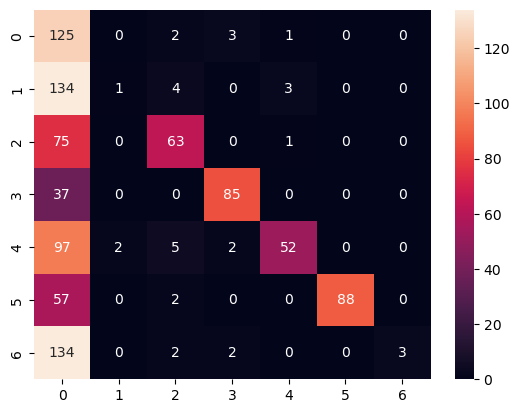

In [68]:
# CART (Classification and Regression Tree)

from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)

y_pred = cart.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
cartDogruluk=accuracy_score(y_test,y_pred)
print("CART doğruluk:", cartDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()


In [69]:
#CART

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = cart, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanCART = accuracy.mean()*100
print('Accuracy', accMeanCART)

43.26530612244898

In [ ]:
"""
GBM doğruluk: 85.61224489795919
Precision değeri: 72.72727272727273
Recall değeri: 79.38931297709924
F1 Score değeri: 75.91240875912409
MAE değeri: 0.4520408163265306
MSE değeri: 1.776530612244898
RMSE değeri: 1.3328655642055196
"""

In [16]:
# Gradient Boosting Machine(GBM)

from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
gbmDogruluk=accuracy_score(y_test,y_pred)
print("GBM doğruluk:", gbmDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       131
           1       0.76      0.85      0.80       142
           2       0.90      0.92      0.91       139
           3       0.92      0.93      0.93       122
           4       0.89      0.80      0.85       158
           5       0.97      0.89      0.93       147
           6       0.84      0.86      0.85       141

    accuracy                           0.87       980
   macro avg       0.87      0.87      0.87       980
weighted avg       0.87      0.87      0.87       980



In [18]:
#GBM

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = gbm, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanGBM = accuracy.mean()*100
print('Accuracy', accMeanGBM)


86.6326530612245

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       131
           1       0.82      0.87      0.85       142
           2       0.88      0.94      0.91       139
           3       0.92      0.95      0.94       122
           4       0.91      0.80      0.85       158
           5       0.96      0.91      0.93       147
           6       0.87      0.87      0.87       141

    accuracy                           0.88       980
   macro avg       0.88      0.89      0.88       980
weighted avg       0.89      0.88      0.88       980

xgboost doğruluk: 88.36734693877551
Precision değeri: 83.82352941176471
Recall değeri: 87.02290076335878
F1 Score değeri: 85.39325842696628
MAE değeri: 0.3469387755102041
MSE değeri: 1.2938775510204081
RMSE değeri: 1.1374873849939646


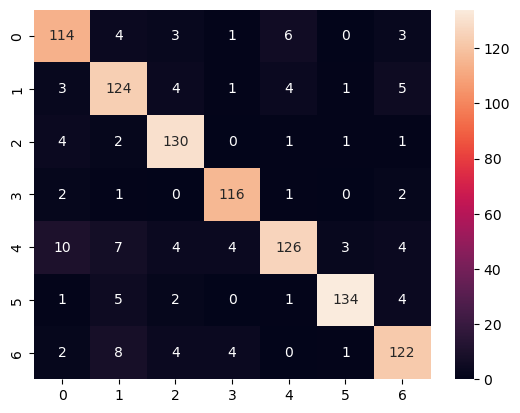

In [19]:
# eXtreme Gradient Boosting (XGBoost)

from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
xgboostDogruluk=accuracy_score(y_test,y_pred)
print("xgboost doğruluk:", xgboostDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [20]:
# xgboost 

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = xgboost, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanXGBOOST = accuracy.mean()*100
print('Accuracy', accMeanXGBOOST)


87.52551020408163

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.391836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128569
[LightGBM] [Info] Number of data points in the train set: 3920, number of used features: 4087
[LightGBM] [Info] Start training from score -1.929966
[LightGBM] [Info] Start training from score -1.949488
[LightGBM] [Info] Start training from score -1.944126
[LightGBM] [Info] Start training from score -1.914273
[LightGBM] [Info] Start training from score -1.978581
[LightGBM] [Info] Start training from score -1.958489
[LightGBM] [Info] Start training from score -1.947697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       131
           1       0.82      0.86      0.84       142
           2       0.87     

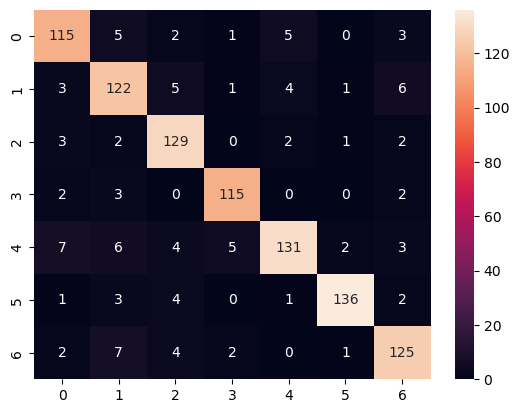

In [21]:
# LightGBM

from lightgbm import LGBMClassifier
lightgbm = LGBMClassifier()
lightgbm.fit(X_train, y_train)

y_pred = lightgbm.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
lightgbmDogruluk=accuracy_score(y_test,y_pred)
print("LightGBM doğruluk:", lightgbmDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [22]:
# LightGBM 

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = lightgbm, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanLGBM = accuracy.mean()*100
print('Accuracy', accMeanLGBM)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.180196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116382
[LightGBM] [Info] Number of data points in the train set: 3528, number of used features: 3841
[LightGBM] [Info] Start training from score -1.930162
[LightGBM] [Info] Start training from score -1.949886
[LightGBM] [Info] Start training from score -1.943928
[LightGBM] [Info] Start training from score -1.914658
[LightGBM] [Info] Start training from score -1.978171
[LightGBM] [Info] Start training from score -1.957886
[LightGBM] [Info] Start training from score -1.947896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.167625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 

88.6734693877551

              precision    recall  f1-score   support

           0       0.57      0.77      0.66       131
           1       0.74      0.77      0.75       142
           2       0.85      0.91      0.88       139
           3       0.87      0.84      0.86       122
           4       0.85      0.69      0.76       158
           5       0.96      0.80      0.87       147
           6       0.80      0.79      0.79       141

    accuracy                           0.79       980
   macro avg       0.81      0.79      0.80       980
weighted avg       0.81      0.79      0.80       980

CatBoost doğruluk: 79.18367346938776
Precision değeri: 57.38636363636363
Recall değeri: 77.09923664122137
F1 Score değeri: 65.79804560260585
MAE değeri: 0.686734693877551
MSE değeri: 2.727551020408163
RMSE değeri: 1.651529902971231


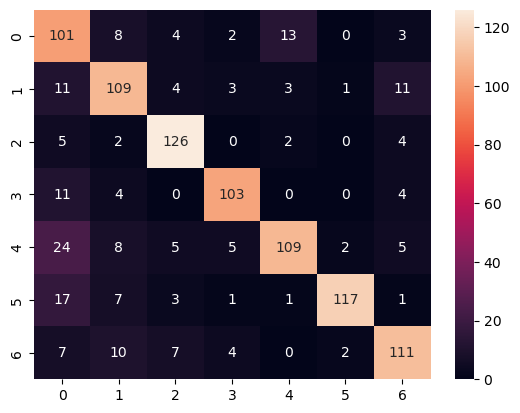

In [23]:
# Category Boosting (CatBoost)

from catboost import CatBoostClassifier
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train, verbose=False)

y_pred = catboost.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
catboostDogruluk=accuracy_score(y_test,y_pred)
print("CatBoost doğruluk:", catboostDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
# CatBoost 

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

accuracyCatB = cross_val_score(estimator = catboost, X=X_train, y=y_train, cv=10, scoring='accuracy')
accMeanCatB = accuracyCatB.mean()*100
print('Accuracy', accMeanCatB)


0:	learn: 1.9428373	total: 13.2s	remaining: 3h 39m 46s
1:	learn: 1.9384744	total: 26.3s	remaining: 3h 39m 2s
2:	learn: 1.9355835	total: 39.5s	remaining: 3h 38m 34s
3:	learn: 1.9317454	total: 52.7s	remaining: 3h 38m 30s
4:	learn: 1.9284319	total: 1m 5s	remaining: 3h 38m 25s
5:	learn: 1.9250754	total: 1m 18s	remaining: 3h 38m 6s
6:	learn: 1.9216765	total: 1m 32s	remaining: 3h 37m 50s
7:	learn: 1.9178854	total: 1m 45s	remaining: 3h 37m 36s
8:	learn: 1.9141965	total: 1m 58s	remaining: 3h 37m 15s
9:	learn: 1.9112317	total: 2m 11s	remaining: 3h 37m 1s
10:	learn: 1.9079276	total: 2m 24s	remaining: 3h 36m 47s
11:	learn: 1.9045946	total: 2m 37s	remaining: 3h 36m 37s
12:	learn: 1.9014187	total: 2m 51s	remaining: 3h 36m 23s
13:	learn: 1.8978630	total: 3m 4s	remaining: 3h 36m 9s
14:	learn: 1.8944332	total: 3m 17s	remaining: 3h 35m 52s
15:	learn: 1.8910520	total: 3m 30s	remaining: 3h 35m 37s
16:	learn: 1.8871860	total: 3m 43s	remaining: 3h 35m 24s
17:	learn: 1.8838741	total: 3m 56s	remaining: 3h 35

143:	learn: 1.6047369	total: 31m 53s	remaining: 3h 9m 37s
144:	learn: 1.6033891	total: 32m 7s	remaining: 3h 9m 24s
145:	learn: 1.6019599	total: 32m 20s	remaining: 3h 9m 12s
146:	learn: 1.6004248	total: 32m 34s	remaining: 3h 8m 59s
147:	learn: 1.5988615	total: 32m 47s	remaining: 3h 8m 46s
148:	learn: 1.5972912	total: 33m	remaining: 3h 8m 33s
149:	learn: 1.5957352	total: 33m 14s	remaining: 3h 8m 19s
150:	learn: 1.5941224	total: 33m 27s	remaining: 3h 8m 6s
151:	learn: 1.5924342	total: 33m 40s	remaining: 3h 7m 54s
152:	learn: 1.5906929	total: 33m 54s	remaining: 3h 7m 41s
153:	learn: 1.5893095	total: 34m 7s	remaining: 3h 7m 28s
154:	learn: 1.5878644	total: 34m 20s	remaining: 3h 7m 15s
155:	learn: 1.5860561	total: 34m 34s	remaining: 3h 7m 2s
156:	learn: 1.5841949	total: 34m 47s	remaining: 3h 6m 50s
157:	learn: 1.5824898	total: 35m 1s	remaining: 3h 6m 37s
158:	learn: 1.5809466	total: 35m 14s	remaining: 3h 6m 26s
159:	learn: 1.5794074	total: 35m 29s	remaining: 3h 6m 21s
160:	learn: 1.5781147	t

284:	learn: 1.4260204	total: 1h 2m 58s	remaining: 2h 37m 59s
285:	learn: 1.4251084	total: 1h 3m 11s	remaining: 2h 37m 46s
286:	learn: 1.4238091	total: 1h 3m 24s	remaining: 2h 37m 32s
287:	learn: 1.4227411	total: 1h 3m 38s	remaining: 2h 37m 19s
288:	learn: 1.4215931	total: 1h 3m 51s	remaining: 2h 37m 5s
289:	learn: 1.4204980	total: 1h 4m 7s	remaining: 2h 36m 59s
290:	learn: 1.4193349	total: 1h 4m 24s	remaining: 2h 36m 56s
291:	learn: 1.4182184	total: 1h 4m 55s	remaining: 2h 37m 25s
292:	learn: 1.4171762	total: 1h 5m 23s	remaining: 2h 37m 47s
293:	learn: 1.4162414	total: 1h 5m 51s	remaining: 2h 38m 8s
294:	learn: 1.4151938	total: 1h 6m 12s	remaining: 2h 38m 14s
295:	learn: 1.4140231	total: 1h 6m 33s	remaining: 2h 38m 18s
296:	learn: 1.4131754	total: 1h 6m 51s	remaining: 2h 38m 15s
297:	learn: 1.4121481	total: 1h 7m 10s	remaining: 2h 38m 14s
298:	learn: 1.4110162	total: 1h 7m 29s	remaining: 2h 38m 13s
299:	learn: 1.4101076	total: 1h 7m 48s	remaining: 2h 38m 12s
300:	learn: 1.4090023	total

418:	learn: 1.3054215	total: 1h 43m 17s	remaining: 2h 23m 13s
419:	learn: 1.3046025	total: 1h 43m 34s	remaining: 2h 23m 2s
420:	learn: 1.3037398	total: 1h 43m 51s	remaining: 2h 22m 50s
421:	learn: 1.3028172	total: 1h 44m 7s	remaining: 2h 22m 36s
422:	learn: 1.3021010	total: 1h 44m 23s	remaining: 2h 22m 23s
423:	learn: 1.3014318	total: 1h 44m 39s	remaining: 2h 22m 10s
424:	learn: 1.3005856	total: 1h 44m 54s	remaining: 2h 21m 56s
425:	learn: 1.2998435	total: 1h 45m 11s	remaining: 2h 21m 44s
426:	learn: 1.2990193	total: 1h 45m 29s	remaining: 2h 21m 33s
427:	learn: 1.2982810	total: 1h 45m 46s	remaining: 2h 21m 21s
428:	learn: 1.2976084	total: 1h 46m 2s	remaining: 2h 21m 7s
429:	learn: 1.2968080	total: 1h 46m 18s	remaining: 2h 20m 55s
430:	learn: 1.2960790	total: 1h 46m 34s	remaining: 2h 20m 42s
431:	learn: 1.2953367	total: 1h 46m 50s	remaining: 2h 20m 29s
432:	learn: 1.2945610	total: 1h 47m 9s	remaining: 2h 20m 19s
433:	learn: 1.2938887	total: 1h 47m 28s	remaining: 2h 20m 9s
434:	learn: 1.

554:	learn: 1.2126648	total: 2h 24m 9s	remaining: 1h 55m 35s
555:	learn: 1.2120598	total: 2h 24m 24s	remaining: 1h 55m 19s
556:	learn: 1.2114130	total: 2h 24m 38s	remaining: 1h 55m 2s
557:	learn: 1.2107665	total: 2h 24m 53s	remaining: 1h 54m 46s
558:	learn: 1.2102499	total: 2h 25m 10s	remaining: 1h 54m 31s
559:	learn: 1.2096726	total: 2h 25m 26s	remaining: 1h 54m 16s
560:	learn: 1.2090815	total: 2h 25m 42s	remaining: 1h 54m 1s
561:	learn: 1.2085010	total: 2h 25m 57s	remaining: 1h 53m 45s
562:	learn: 1.2078873	total: 2h 26m 12s	remaining: 1h 53m 29s
563:	learn: 1.2071510	total: 2h 26m 32s	remaining: 1h 53m 17s
564:	learn: 1.2064894	total: 2h 26m 48s	remaining: 1h 53m 1s
565:	learn: 1.2059152	total: 2h 27m 1s	remaining: 1h 52m 44s
566:	learn: 1.2052435	total: 2h 27m 16s	remaining: 1h 52m 28s
567:	learn: 1.2046715	total: 2h 27m 31s	remaining: 1h 52m 11s
568:	learn: 1.2040283	total: 2h 27m 49s	remaining: 1h 51m 58s
569:	learn: 1.2034365	total: 2h 28m 4s	remaining: 1h 51m 42s
570:	learn: 1.

In [1]:
modeller = pd.DataFrame({'Model':['Logistik Regresyon',
                                  'Karar Ağaçları',
                                  'Rastgele Orman',
                                  'Destek Vektör Makinesi',
                                  'K-en yakın komşu',
                                  'Gaussian NB',
                                   'Keras',
                                   'ANN',
                                   'CART',
                                   'GBM',
                                   'XGBoost',
                                   'LightGBM',
                                   'CatBoost'
                                   ],
                        'Score':[ logDogruluk,dtDogruluk,randomForestDogruluk,dvmDogruluk,knnDogruluk,gnbDogruluk,kerasScores[1],annDogruluk,cartDogruluk,gbmDogruluk,xgboostDogruluk,lightgbmDogruluk,catboostDogruluk ] })

modeller

NameError: name 'pd' is not defined

In [ ]:
modeller.sort_values(by='Score',ascending=False)

In [ ]:
sns.barplot( x = modeller.Score , y=modeller.Model )

plt.xlabel("Score")
plt.ylabel("Modeller")
plt.title("Sınıflandırma model scorları")
plt.show()

In [ ]:
#k-fold sonuçları
modeller = pd.DataFrame({'Model':['Logistik Regresyon',
                                  'Karar Ağaçları',
                                  'Rastgele Orman',
                                  'Destek Vektör Makinesi',
                                  'K-en yakın komşu',
                                  'Gaussian NB',
                                   'Keras',
                                   'ANN',
                                   'CART',
                                   'GBM',
                                   'XGBoost',
                                   'LightGBM',
                                   'CatBoost'
                                 ],
                        'Score':[accMeanlogr,accMeanDT,accMeanRFC,accMeanSVC,accMeanKNN,accMeanGNB,accMeanKeras,accMeanANN,accMeanCART,accMeanGBM,accMeanXGBOOST,accMeanLGBM,accMeanCatB]})
modeller

In [ ]:
modeller.sort_values(by='Score',ascending=False)

In [ ]:
sns.barplot( x= modeller.Score , y=modeller.Model )

plt.xlabel("Score")
plt.ylabel("Modeller")
plt.title("Sınıflandırma model scorları")
plt.show()

In [ ]:
# derin öğrenme algoritmaları ile sınıflandırma

from keras.models import Sequential
from keras.layers import Dense

kerasModel=Sequential()
kerasModel.add(Dense(28, input_dim=58, kernel_initializer="uniform", activation='relu'))
kerasModel.add(Dense(28, kernel_initializer='uniform', activation='relu'))
kerasModel.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
print("Ağ oluşturuldu...")

In [ ]:
kerasModel.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
print("Ağ derlendi...")

In [ ]:
kerasModel.fit(X_train, y_train,
          epochs=150, 
          batch_size=10, 
          verbose=0)
print("Ağ eğitildi...")

In [ ]:
kerasScores=kerasModel.evaluate(X_test,y_test)
print("Ağ başarı oran:%{:.2f}".format(kerasScores[1]*100))

In [ ]:
y_pred = kerasModel.predict(X_test)

y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

#print(cm)
print(classification_report(y_test,y_pred))

# Accuracy
kerasDogruluk=accuracy_score(y_test,y_pred)
print("keras doğruluk:", kerasDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f", cmap="BuPu")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold

number_of_sample=len(X)
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
cv_scores=list()
counter=1

for train, test in kfold.split(X_train, y_train):
    kerasModelK=Sequential()
    kerasModelK.add(Dense(28, input_dim=58, kernel_initializer="uniform", activation='relu'))
    kerasModelK.add(Dense(28, kernel_initializer='uniform', activation='relu'))
    kerasModelK.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    print("CV{}:Ağ oluşturuldu...".format(counter))
    kerasModelK.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
    print("CV{}:Ağ derlendi...".format(counter))
    kerasModelK.fit(X_train, y_train,
              epochs=150, 
              batch_size=10, 
              verbose=0)
    print("CV{}:Model eğitildi..".format(counter))
    scores=kerasModelK.evaluate(X_train, y_train)
    print("CV{}:Ağ başarı oran:%{:.2f}".format(counter, scores[1]*100))
    cv_scores.append(scores[1]*100)
    counter+=1
    print()

In [ ]:
print("Ortalama başarı oranı:%{:.2f} (+/- {:.2f})".format(
    np.mean(cv_scores),
    np.std(cv_scores))) 

accKeras = np.mean(cv_scores)
accKeras

In [ ]:
y_pred = kerasModelK.predict(X_test)

y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

#print(cm)
print(classification_report(y_test,y_pred))

# Accuracy
accMeanKeras=accuracy_score(y_test,y_pred)
accMeanKeras = accMeanKeras*100
print("keras doğruluk:", accMeanKeras)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f", cmap="BuPu")
plt.show()

In [17]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


lgbm = LGBMClassifier()
xgb = XGBClassifier()

lgbm.fit(X_train,y_train)
xgb.fit(X_train,y_train)
y_pred_lgbm = lgbm.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.457382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128569
[LightGBM] [Info] Number of data points in the train set: 3920, number of used features: 4087
[LightGBM] [Info] Start training from score -1.929966
[LightGBM] [Info] Start training from score -1.949488
[LightGBM] [Info] Start training from score -1.944126
[LightGBM] [Info] Start training from score -1.914273
[LightGBM] [Info] Start training from score -1.978581
[LightGBM] [Info] Start training from score -1.958489
[LightGBM] [Info] Start training from score -1.947697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [26]:
print("Accuracy lgbm:",accuracy_score(y_test, y_pred_lgbm))
print("Precision lgbm:",precision_score(y_test, y_pred_lgbm,average="micro"))

print("Accuracy xgb:",accuracy_score(y_test, y_pred_xgb))
print("Precision xgb:",precision_score(y_test, y_pred_xgb,average="micro"))



Accuracy lgbm: 0.8908163265306123
Precision lgbm: 0.8908163265306123
Accuracy xgb: 0.8836734693877552
Precision xgb: 0.8836734693877552


# GRIDSEARCHCV

In [24]:

"""
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
"""

"""
svc için en iyi değerler
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
"""

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.765 total time= 2.6min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.749 total time= 2.4min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time= 2.4min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.759 total time= 2.4min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time= 2.4min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.208 total time= 2.2min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.209 total time= 2.3min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.205 total time= 2.3min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.221 total time= 2.3min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.205 total time= 2.4min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.147 total time= 2.1min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.925 total time= 2.0min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.898 total time= 1.9min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.912 total time= 2.1min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.861 total time= 2.0min
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.894 total time= 1.1min
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.913 total time= 1.2min
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.894 total time= 1.1min
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.908 total time= 1.1min
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.864 total time= 1.1min
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.890 total time= 1.0min
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.912 total time= 1.1min
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.895 total time= 1.1min
[CV 4/5] END ....C=1000, gam